## q2_a

In [1]:
import numpy as np
import pandas as pd
import os
import re
from tqdm import tqdm
import datetime

In [2]:
b1_data = pd.read_excel(r'E:\教材\华科\研二上\数模\MCM\竞赛发布数据\表1-患者列表及临床信息.xlsx')
train_ID = b1_data['Unnamed: 0'].tolist()[:100]
train_ID

['sub001',
 'sub002',
 'sub003',
 'sub004',
 'sub005',
 'sub006',
 'sub007',
 'sub008',
 'sub009',
 'sub010',
 'sub011',
 'sub012',
 'sub013',
 'sub014',
 'sub015',
 'sub016',
 'sub017',
 'sub018',
 'sub019',
 'sub020',
 'sub021',
 'sub022',
 'sub023',
 'sub024',
 'sub025',
 'sub026',
 'sub027',
 'sub028',
 'sub029',
 'sub030',
 'sub031',
 'sub032',
 'sub033',
 'sub034',
 'sub035',
 'sub036',
 'sub037',
 'sub038',
 'sub039',
 'sub040',
 'sub041',
 'sub042',
 'sub043',
 'sub044',
 'sub045',
 'sub046',
 'sub047',
 'sub048',
 'sub049',
 'sub050',
 'sub051',
 'sub052',
 'sub053',
 'sub054',
 'sub055',
 'sub056',
 'sub057',
 'sub058',
 'sub059',
 'sub060',
 'sub061',
 'sub062',
 'sub063',
 'sub064',
 'sub065',
 'sub066',
 'sub067',
 'sub068',
 'sub069',
 'sub070',
 'sub071',
 'sub072',
 'sub073',
 'sub074',
 'sub075',
 'sub076',
 'sub077',
 'sub078',
 'sub079',
 'sub080',
 'sub081',
 'sub082',
 'sub083',
 'sub084',
 'sub085',
 'sub086',
 'sub087',
 'sub088',
 'sub089',
 'sub090',
 'sub091',

In [3]:
new_b2_data = pd.read_csv(r'E:\教材\华科\研二上\数模\MCM\竞赛发布数据\表2-long.csv', dtype = str)
new_b2_data = new_b2_data[new_b2_data['ID'].isin(train_ID)]
new_b2_data['ED_volume'] = [float(x) for x in new_b2_data['ED_volume']]

In [4]:
new_b2_data = new_b2_data[['ID', 'follow_up_count', '流水号', 'ED_volume']].copy()
new_b2_data['ED_volume'] = [float(x) for x in new_b2_data['ED_volume']]
new_b2_data

,ID,follow_up_count,流水号,ED_volume
0,sub001,0,20161212002136,48919.0
1,sub001,1,20161213000009,57898.0
2,sub001,2,20161218000100,81747.0
3,sub001,3,20161223001020,107793.0
4,sub001,4,20161230000574,126558.0
...,...,...,...,...
445,sub099,1,20180621000781,19517.0
446,sub099,2,20180622000871,30933.0
447,sub100,0,20180314000010,7367.0
448,sub100,1,20180315001448,6033.0


In [5]:
## 根据ID，连接其发病时间
b1_data = pd.read_excel(r'E:\教材\华科\研二上\数模\MCM\竞赛发布数据\表1-患者列表及临床信息.xlsx', dtype = str)
b1_data = b1_data[['Unnamed: 0', '发病到首次影像检查时间间隔']]
b1_data.columns = ['ID', '发病到首次影像检查时间间隔']
b1_data['发病到首次影像检查时间间隔'] = [float(x) for x in b1_data['发病到首次影像检查时间间隔']]
b1_data

,ID,发病到首次影像检查时间间隔
0,sub001,2.5
1,sub002,3.0
2,sub003,2.0
3,sub004,1.0
4,sub005,5.0
...,...,...
155,sub156,5.5
156,sub157,0.5
157,sub158,2.8
158,sub159,3.0


In [6]:
new_b2_data = pd.merge(new_b2_data, b1_data, left_on = "ID", right_on = "ID", how = "left")
new_b2_data

,ID,follow_up_count,流水号,ED_volume,发病到首次影像检查时间间隔
0,sub001,0,20161212002136,48919.0,2.5
1,sub001,1,20161213000009,57898.0,2.5
2,sub001,2,20161218000100,81747.0,2.5
3,sub001,3,20161223001020,107793.0,2.5
4,sub001,4,20161230000574,126558.0,2.5
...,...,...,...,...,...
445,sub099,1,20180621000781,19517.0,3.0
446,sub099,2,20180622000871,30933.0,3.0
447,sub100,0,20180314000010,7367.0,0.5
448,sub100,1,20180315001448,6033.0,0.5


In [7]:
## 根据流水号，连接其流水号发生时间
fb1_data = pd.read_csv(r'E:\教材\华科\研二上\数模\MCM\竞赛发布数据\附表1-long.csv', dtype = str)
tmp1, tmp2 = fb1_data[['sub_code', '入院首次检查流水号', '入院首次检查时间点']].copy(), fb1_data[['sub_code', '流水号', '时间点']].copy()
tmp1.columns = ['ID', '流水号', '时间点']
tmp2.columns = ['ID', '流水号', '时间点']
fb1_data = pd.concat([tmp1, tmp2], axis = 0)
fb1_data = fb1_data.drop_duplicates()
fb1_data

,ID,流水号,时间点
0,sub001,20161212002136,2016-12-12 23:32:54
4,sub002,20160406002131,2016-04-06 21:21:03
8,sub003,20160413000006,2016-04-13 01:18:17
10,sub004,20161215001667,2016-12-15 22:53:41
13,sub005,20161222000978,2016-12-22 13:18:48
...,...,...,...
492,sub158,20200411000244,2020-04-11 09:15:00
493,sub158,20200413001806,2020-04-13 14:10:00
494,sub158,20200423000871,2020-04-23 11:31:00
495,sub159,20200219000588,2020-02-19 15:01:00


In [8]:
new_b2_data = pd.merge(new_b2_data, fb1_data, left_on = ["ID", "流水号"], right_on = ["ID", "流水号"], how = "left")
new_b2_data['时间点'] = [datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S" ) for x in new_b2_data['时间点']]
new_b2_data

,ID,follow_up_count,流水号,ED_volume,发病到首次影像检查时间间隔,时间点
0,sub001,0,20161212002136,48919.0,2.5,2016-12-12 23:32:54
1,sub001,1,20161213000009,57898.0,2.5,2016-12-13 05:19:00
2,sub001,2,20161218000100,81747.0,2.5,2016-12-18 09:09:24
3,sub001,3,20161223001020,107793.0,2.5,2016-12-23 16:47:09
4,sub001,4,20161230000574,126558.0,2.5,2016-12-30 14:35:12
...,...,...,...,...,...,...
445,sub099,1,20180621000781,19517.0,3.0,2018-06-21 09:43:31
446,sub099,2,20180622000871,30933.0,3.0,2018-06-22 10:34:55
447,sub100,0,20180314000010,7367.0,0.5,2018-03-14 04:46:39
448,sub100,1,20180315001448,6033.0,0.5,2018-03-15 15:00:31


In [9]:
new_b2_data['first_examination'] = 0
for i_row in tqdm(range(len(new_b2_data))):
    tmp_id = new_b2_data.loc[i_row, 'ID']
    tmp_df = new_b2_data[new_b2_data['ID'] == tmp_id]
    tmp_df = tmp_df[tmp_df['follow_up_count'] == '0']['时间点'].values[0]
    
    new_b2_data.loc[i_row, 'first_examination'] = pd.Timestamp(tmp_df)        ## 这里的tmp_df为时间的值
    
new_b2_data

  0%|          | 0/450 [00:00<?, ?it/s]

100%|██████████| 450/450 [00:00<00:00, 681.02it/s]


,ID,follow_up_count,流水号,ED_volume,发病到首次影像检查时间间隔,时间点,first_examination
0,sub001,0,20161212002136,48919.0,2.5,2016-12-12 23:32:54,2016-12-12 23:32:54
1,sub001,1,20161213000009,57898.0,2.5,2016-12-13 05:19:00,2016-12-12 23:32:54
2,sub001,2,20161218000100,81747.0,2.5,2016-12-18 09:09:24,2016-12-12 23:32:54
3,sub001,3,20161223001020,107793.0,2.5,2016-12-23 16:47:09,2016-12-12 23:32:54
4,sub001,4,20161230000574,126558.0,2.5,2016-12-30 14:35:12,2016-12-12 23:32:54
...,...,...,...,...,...,...,...
445,sub099,1,20180621000781,19517.0,3.0,2018-06-21 09:43:31,2018-06-20 19:03:09
446,sub099,2,20180622000871,30933.0,3.0,2018-06-22 10:34:55,2018-06-20 19:03:09
447,sub100,0,20180314000010,7367.0,0.5,2018-03-14 04:46:39,2018-03-14 04:46:39
448,sub100,1,20180315001448,6033.0,0.5,2018-03-15 15:00:31,2018-03-14 04:46:39


In [10]:
new_b2_data['time_from_disease'] = new_b2_data['时间点'] - new_b2_data['first_examination']
new_b2_data

e:\Anaconda\lib\site-packages\pandas\core\arrays\datetimelike.py:1190: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,


,ID,follow_up_count,流水号,ED_volume,发病到首次影像检查时间间隔,时间点,first_examination,time_from_disease
0,sub001,0,20161212002136,48919.0,2.5,2016-12-12 23:32:54,2016-12-12 23:32:54,0 days 00:00:00
1,sub001,1,20161213000009,57898.0,2.5,2016-12-13 05:19:00,2016-12-12 23:32:54,0 days 05:46:06
2,sub001,2,20161218000100,81747.0,2.5,2016-12-18 09:09:24,2016-12-12 23:32:54,5 days 09:36:30
3,sub001,3,20161223001020,107793.0,2.5,2016-12-23 16:47:09,2016-12-12 23:32:54,10 days 17:14:15
4,sub001,4,20161230000574,126558.0,2.5,2016-12-30 14:35:12,2016-12-12 23:32:54,17 days 15:02:18
...,...,...,...,...,...,...,...,...
445,sub099,1,20180621000781,19517.0,3.0,2018-06-21 09:43:31,2018-06-20 19:03:09,0 days 14:40:22
446,sub099,2,20180622000871,30933.0,3.0,2018-06-22 10:34:55,2018-06-20 19:03:09,1 days 15:31:46
447,sub100,0,20180314000010,7367.0,0.5,2018-03-14 04:46:39,2018-03-14 04:46:39,0 days 00:00:00
448,sub100,1,20180315001448,6033.0,0.5,2018-03-15 15:00:31,2018-03-14 04:46:39,1 days 10:13:52


In [11]:
new_b2_data['time_from_disease'] = [x.days * 24 + x.seconds / 3600 for x in new_b2_data['time_from_disease']]
new_b2_data

,ID,follow_up_count,流水号,ED_volume,发病到首次影像检查时间间隔,时间点,first_examination,time_from_disease
0,sub001,0,20161212002136,48919.0,2.5,2016-12-12 23:32:54,2016-12-12 23:32:54,0.000000
1,sub001,1,20161213000009,57898.0,2.5,2016-12-13 05:19:00,2016-12-12 23:32:54,5.768333
2,sub001,2,20161218000100,81747.0,2.5,2016-12-18 09:09:24,2016-12-12 23:32:54,129.608333
3,sub001,3,20161223001020,107793.0,2.5,2016-12-23 16:47:09,2016-12-12 23:32:54,257.237500
4,sub001,4,20161230000574,126558.0,2.5,2016-12-30 14:35:12,2016-12-12 23:32:54,423.038333
...,...,...,...,...,...,...,...,...
445,sub099,1,20180621000781,19517.0,3.0,2018-06-21 09:43:31,2018-06-20 19:03:09,14.672778
446,sub099,2,20180622000871,30933.0,3.0,2018-06-22 10:34:55,2018-06-20 19:03:09,39.529444
447,sub100,0,20180314000010,7367.0,0.5,2018-03-14 04:46:39,2018-03-14 04:46:39,0.000000
448,sub100,1,20180315001448,6033.0,0.5,2018-03-15 15:00:31,2018-03-14 04:46:39,34.231111


In [12]:
new_b2_data['time_from_disease'] = new_b2_data['time_from_disease'] + new_b2_data['发病到首次影像检查时间间隔']
new_b2_data

,ID,follow_up_count,流水号,ED_volume,发病到首次影像检查时间间隔,时间点,first_examination,time_from_disease
0,sub001,0,20161212002136,48919.0,2.5,2016-12-12 23:32:54,2016-12-12 23:32:54,2.500000
1,sub001,1,20161213000009,57898.0,2.5,2016-12-13 05:19:00,2016-12-12 23:32:54,8.268333
2,sub001,2,20161218000100,81747.0,2.5,2016-12-18 09:09:24,2016-12-12 23:32:54,132.108333
3,sub001,3,20161223001020,107793.0,2.5,2016-12-23 16:47:09,2016-12-12 23:32:54,259.737500
4,sub001,4,20161230000574,126558.0,2.5,2016-12-30 14:35:12,2016-12-12 23:32:54,425.538333
...,...,...,...,...,...,...,...,...
445,sub099,1,20180621000781,19517.0,3.0,2018-06-21 09:43:31,2018-06-20 19:03:09,17.672778
446,sub099,2,20180622000871,30933.0,3.0,2018-06-22 10:34:55,2018-06-20 19:03:09,42.529444
447,sub100,0,20180314000010,7367.0,0.5,2018-03-14 04:46:39,2018-03-14 04:46:39,0.500000
448,sub100,1,20180315001448,6033.0,0.5,2018-03-15 15:00:31,2018-03-14 04:46:39,34.731111


In [13]:
## 异常值处理
def three_sigma(array):
    mu = np.mean(array)
    sigma = np.std(array)
    list_res = []
    for i in array:
        if i > mu + 3 * sigma:
            list_res.append(mu + 3 * sigma)
        elif i < mu - 3 * sigma:
            list_res.append(mu - 3 * sigma)
        else:
            list_res.append(i)
    return list_res
new_b2_data['ED_volume'] = three_sigma(new_b2_data['ED_volume'])
new_b2_data

,ID,follow_up_count,流水号,ED_volume,发病到首次影像检查时间间隔,时间点,first_examination,time_from_disease
0,sub001,0,20161212002136,48919.000000,2.5,2016-12-12 23:32:54,2016-12-12 23:32:54,2.500000
1,sub001,1,20161213000009,57898.000000,2.5,2016-12-13 05:19:00,2016-12-12 23:32:54,8.268333
2,sub001,2,20161218000100,81747.000000,2.5,2016-12-18 09:09:24,2016-12-12 23:32:54,132.108333
3,sub001,3,20161223001020,104758.882133,2.5,2016-12-23 16:47:09,2016-12-12 23:32:54,259.737500
4,sub001,4,20161230000574,104758.882133,2.5,2016-12-30 14:35:12,2016-12-12 23:32:54,425.538333
...,...,...,...,...,...,...,...,...
445,sub099,1,20180621000781,19517.000000,3.0,2018-06-21 09:43:31,2018-06-20 19:03:09,17.672778
446,sub099,2,20180622000871,30933.000000,3.0,2018-06-22 10:34:55,2018-06-20 19:03:09,42.529444
447,sub100,0,20180314000010,7367.000000,0.5,2018-03-14 04:46:39,2018-03-14 04:46:39,0.500000
448,sub100,1,20180315001448,6033.000000,0.5,2018-03-15 15:00:31,2018-03-14 04:46:39,34.731111


## 画图看看时间与水肿体积的关系

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

No handles with labels found to put in legend.


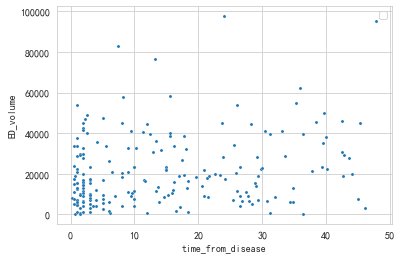

In [15]:
tmp_data = new_b2_data.copy()
tmp_data = tmp_data[tmp_data['time_from_disease'] <= 48]
sns.scatterplot(x = 'time_from_disease', y = 'ED_volume', data = tmp_data, s = 10, legend = False)
plt.legend()

e:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
e:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
e:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
e:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a 

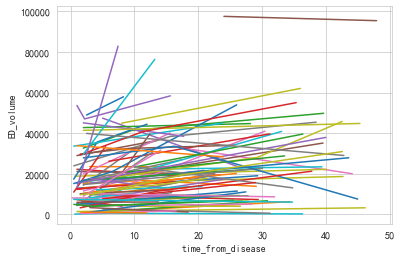

In [16]:
tmp_data = new_b2_data.copy()
IDs = new_b2_data['ID'].unique().tolist()
tmp_data = tmp_data[tmp_data['time_from_disease'] <= 24 * 2]
for i in IDs:
    tmp_tmp_data = tmp_data[tmp_data['ID'] == i]
    # if len(tmp_tmp_data) >= 3:
    sns.lineplot(x = tmp_tmp_data['time_from_disease'], y = tmp_tmp_data['ED_volume'])
# sns.lineplot(x = tmp_data['time_from_disease'], y = tmp_data['ED_volume'])

  0%|          | 0/100 [00:00<?, ?it/s]e:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  from ipykernel import kernelapp as app
e:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
e:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
e:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxi

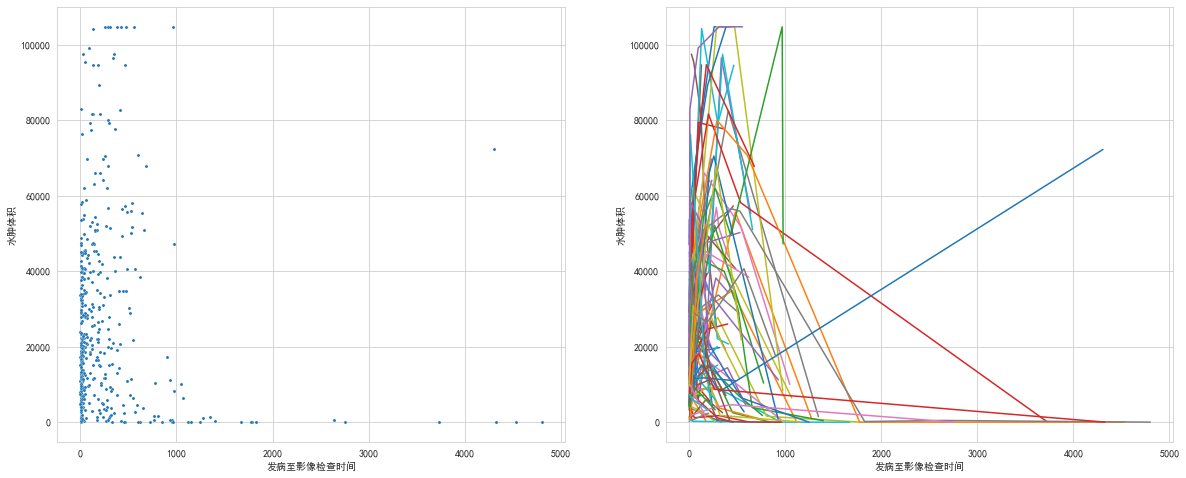

In [17]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
tmp_data = new_b2_data.copy()
# tmp_data = tmp_data[tmp_data['time_from_disease'] <= 48]
sns.scatterplot(x = 'time_from_disease', y = 'ED_volume', data = tmp_data, s = 10, legend = False)
plt.xlabel('发病至影像检查时间')
plt.ylabel('水肿体积')

plt.subplot(122)
tmp_data = new_b2_data.copy()
IDs = new_b2_data['ID'].unique().tolist()
# tmp_data = tmp_data[tmp_data['time_from_disease'] <= 24 * 2]
for i in tqdm(IDs):
    tmp_tmp_data = tmp_data[tmp_data['ID'] == i]
    sns.lineplot(x = tmp_tmp_data['time_from_disease'], y = tmp_tmp_data['ED_volume'], palette = sns.color_palette("Paired"))
plt.xlabel('发病至影像检查时间')
plt.ylabel('水肿体积')

plt.savefig(os.path.dirname(os.path.dirname(__vsc_ipynb_file__)) + ".\\plots\\水肿体积随时间进展.png", bbox_inches = 'tight', dpi = 600)
plt.show()

In [18]:
import sklearn.pipeline as pl
import sklearn.preprocessing as sp
import sklearn.linear_model as lm
import statsmodels.api as sm
import scipy.optimize as optimize

e:\Anaconda\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
e:\Anaconda\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).ep

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:00<00:00,  6.51it/s]


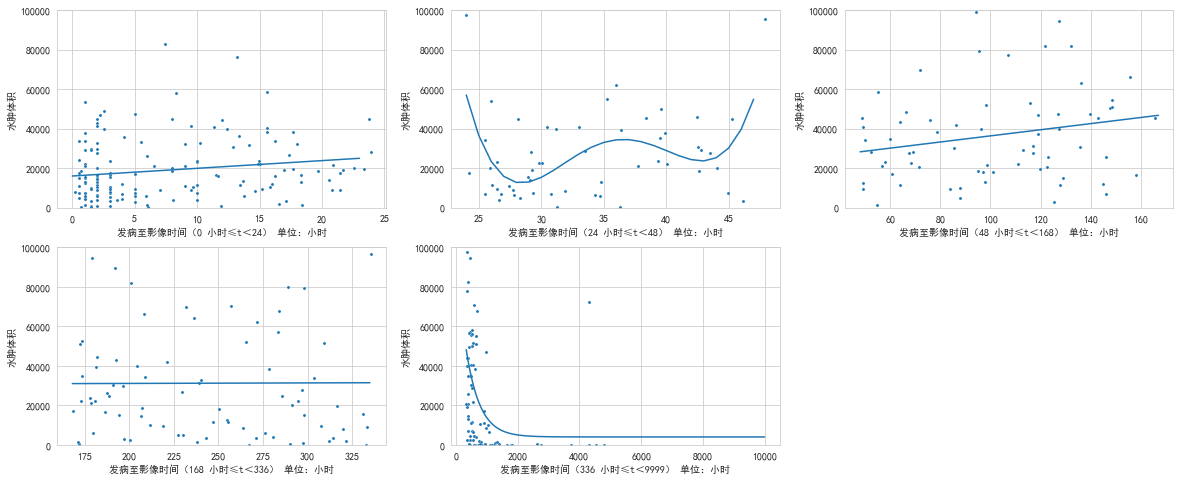

In [19]:
time_var = [0, 24, 48, 7 * 24, 14 * 24, 9999]
tmp_data = new_b2_data.copy()
plt.figure(figsize=(20,8))
model_param_list = []
for i in tqdm(range(len(time_var) - 1)):
    tmp_df = tmp_data[(tmp_data['time_from_disease'] >= time_var[i]) & (tmp_data['time_from_disease'] < time_var[i + 1])]
    x, y = tmp_df['time_from_disease'].to_numpy().reshape(-1, 1), tmp_df['ED_volume'].to_numpy()
    
    if i < 4:
        bic_list = []
        for poly in range(1, 5):
            x, y = tmp_df['time_from_disease'].to_numpy().reshape(-1, 1), tmp_df['ED_volume'].to_numpy()
            model = sp.PolynomialFeatures(degree = poly)
            x = model.fit_transform(x)
            poly_fit = sm.OLS(y, x).fit()
            bic_list.append(poly_fit.bic)
            # print(i, poly, poly_fit.bic)
        min_poly = list(range(1, 5))[bic_list.index(min(bic_list))]
        
        x, y = tmp_df['time_from_disease'].to_numpy().reshape(-1, 1), tmp_df['ED_volume'].to_numpy()
        model = sp.PolynomialFeatures(degree = min_poly)
        x = model.fit_transform(x)
        poly_fit = sm.OLS(y, x).fit()
        def fit_fun(x, i, params):
            if i < 4:
                res = 0
                for i_pointer, i_para in enumerate(params):
                    res += i_para * (x ** i_pointer)
            else:
                res = target_func(x, params[0], params[1], params[2])
            return float(res)
        # print(poly_fit.params)
        # x_plot = np.arange(time_var[i], time_var[i + 1]).reshape(-1, 1)
        # x_plot = model.fit_transform(x_plot)
        # y_plot = poly_fit.predict(x_plot)
        model_param_list.append(poly_fit.params)
        x_plot = np.arange(time_var[i], time_var[i + 1])
        y_plot = [fit_fun(a, i, poly_fit.params) for a in x_plot]
    else:
        def target_func(x, a0, a1, a2):
            return a0 * np.exp(-x / a1) + a2

        x = x.flatten()
        a0 = max(y) - min(y)
        a1 = x[round(len(x) / 2)]
        a2 = min(y)
        p0 = [a0, a1, a2]
        
        para, cov = optimize.curve_fit(target_func, x, y, p0=p0)
        
        # print(para)
        model_param_list.append(para)
        x_plot = np.arange(time_var[i], time_var[i + 1])
        y_plot = y_fit = [fit_fun(a, i, para) for a in x_plot]

        
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x = 'time_from_disease', y = 'ED_volume', data = tmp_df, s = 10, legend = False)
    if i < 4:
        # print(x_plot, y_plot)
        plt.plot(x_plot, y_plot)
    else:
        plt.plot(x_plot, y_plot)
    plt.ylabel('水肿体积')
    plt.xlabel('发病至影像时间（{} 小时≤t＜{}） 单位：小时'.format(time_var[i],time_var[i + 1]))
    plt.ylim(0, 100000)

plt.savefig(os.path.dirname(os.path.dirname(__vsc_ipynb_file__)) + ".\\plots\\水肿体积随时间进展曲线.png", bbox_inches = 'tight', dpi = 600)
plt.show()


In [20]:
model_param_list

[array([16031.13795419,   389.63886705]),
 array([ 8.99226685e+06, -1.04291561e+06,  4.47644951e+04, -8.41310266e+02,
         5.84920365e+00]),
 array([20829.02737186,   155.12132403]),
 array([3.05786653e+04, 2.61448244e+00]),
 array([94494.71449708,   441.65446192,  4026.67911164])]

## 导出模型计算残差

In [21]:
## 计算残差
cal_error_data = new_b2_data.copy()
cal_error_data

,ID,follow_up_count,流水号,ED_volume,发病到首次影像检查时间间隔,时间点,first_examination,time_from_disease
0,sub001,0,20161212002136,48919.000000,2.5,2016-12-12 23:32:54,2016-12-12 23:32:54,2.500000
1,sub001,1,20161213000009,57898.000000,2.5,2016-12-13 05:19:00,2016-12-12 23:32:54,8.268333
2,sub001,2,20161218000100,81747.000000,2.5,2016-12-18 09:09:24,2016-12-12 23:32:54,132.108333
3,sub001,3,20161223001020,104758.882133,2.5,2016-12-23 16:47:09,2016-12-12 23:32:54,259.737500
4,sub001,4,20161230000574,104758.882133,2.5,2016-12-30 14:35:12,2016-12-12 23:32:54,425.538333
...,...,...,...,...,...,...,...,...
445,sub099,1,20180621000781,19517.000000,3.0,2018-06-21 09:43:31,2018-06-20 19:03:09,17.672778
446,sub099,2,20180622000871,30933.000000,3.0,2018-06-22 10:34:55,2018-06-20 19:03:09,42.529444
447,sub100,0,20180314000010,7367.000000,0.5,2018-03-14 04:46:39,2018-03-14 04:46:39,0.500000
448,sub100,1,20180315001448,6033.000000,0.5,2018-03-15 15:00:31,2018-03-14 04:46:39,34.731111


In [22]:
def get_i_time_var(time_from_disease, time_var_list):
    for j in range(len(time_var_list) - 1):
        if time_var_list[j] <= time_from_disease < time_var_list[j + 1]:
            return j

def fit_fun(x, i, params):
    if i < 4:
        res = 0
        for i_pointer, i_para in enumerate(params):
            res += i_para * (x ** i_pointer)
    else:
        res = target_func(x, params[0], params[1], params[2])
    return float(res)

get_i_time_var(49, time_var)            ## \test

2

In [23]:
for i_row in range(len(cal_error_data)):
    i_time_var = get_i_time_var(cal_error_data.loc[i_row, 'time_from_disease'], time_var)
    cal_error_data.loc[i_row, 'ED_volume_pred'] = fit_fun(cal_error_data.loc[i_row, 'time_from_disease'], i_time_var, model_param_list[i_time_var])
    
cal_error_data

,ID,follow_up_count,流水号,ED_volume,发病到首次影像检查时间间隔,时间点,first_examination,time_from_disease,ED_volume_pred
0,sub001,0,20161212002136,48919.000000,2.5,2016-12-12 23:32:54,2016-12-12 23:32:54,2.500000,17005.235122
1,sub001,1,20161213000009,57898.000000,2.5,2016-12-13 05:19:00,2016-12-12 23:32:54,8.268333,19252.801987
2,sub001,2,20161218000100,81747.000000,2.5,2016-12-18 09:09:24,2016-12-12 23:32:54,132.108333,41321.846955
3,sub001,3,20161223001020,104758.882133,2.5,2016-12-23 16:47:09,2016-12-12 23:32:54,259.737500,31257.744421
4,sub001,4,20161230000574,104758.882133,2.5,2016-12-30 14:35:12,2016-12-12 23:32:54,425.538333,40081.271960
...,...,...,...,...,...,...,...,...,...
445,sub099,1,20180621000781,19517.000000,3.0,2018-06-21 09:43:31,2018-06-20 19:03:09,17.672778,22917.139065
446,sub099,2,20180622000871,30933.000000,3.0,2018-06-22 10:34:55,2018-06-20 19:03:09,42.529444,23749.504361
447,sub100,0,20180314000010,7367.000000,0.5,2018-03-14 04:46:39,2018-03-14 04:46:39,0.500000,16225.957388
448,sub100,1,20180315001448,6033.000000,0.5,2018-03-15 15:00:31,2018-03-14 04:46:39,34.731111,32452.129600


In [24]:
cal_error_data['ED_volume_error'] = cal_error_data['ED_volume'] - cal_error_data['ED_volume_pred']
cal_error_data

,ID,follow_up_count,流水号,ED_volume,发病到首次影像检查时间间隔,时间点,first_examination,time_from_disease,ED_volume_pred,ED_volume_error
0,sub001,0,20161212002136,48919.000000,2.5,2016-12-12 23:32:54,2016-12-12 23:32:54,2.500000,17005.235122,31913.764878
1,sub001,1,20161213000009,57898.000000,2.5,2016-12-13 05:19:00,2016-12-12 23:32:54,8.268333,19252.801987,38645.198013
2,sub001,2,20161218000100,81747.000000,2.5,2016-12-18 09:09:24,2016-12-12 23:32:54,132.108333,41321.846955,40425.153045
3,sub001,3,20161223001020,104758.882133,2.5,2016-12-23 16:47:09,2016-12-12 23:32:54,259.737500,31257.744421,73501.137711
4,sub001,4,20161230000574,104758.882133,2.5,2016-12-30 14:35:12,2016-12-12 23:32:54,425.538333,40081.271960,64677.610173
...,...,...,...,...,...,...,...,...,...,...
445,sub099,1,20180621000781,19517.000000,3.0,2018-06-21 09:43:31,2018-06-20 19:03:09,17.672778,22917.139065,-3400.139065
446,sub099,2,20180622000871,30933.000000,3.0,2018-06-22 10:34:55,2018-06-20 19:03:09,42.529444,23749.504361,7183.495639
447,sub100,0,20180314000010,7367.000000,0.5,2018-03-14 04:46:39,2018-03-14 04:46:39,0.500000,16225.957388,-8858.957388
448,sub100,1,20180315001448,6033.000000,0.5,2018-03-15 15:00:31,2018-03-14 04:46:39,34.731111,32452.129600,-26419.129600


e:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
e:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
e:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


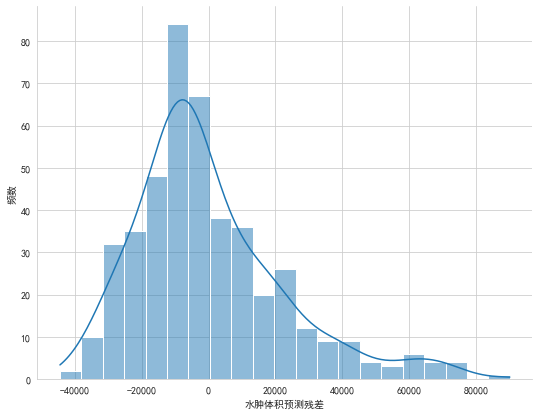

In [25]:
ax = sns.displot(cal_error_data['ED_volume_error'], kde = True)
ax.figure.set_size_inches(8,6)

plt.xlabel('水肿体积预测残差')
plt.ylabel('频数')

plt.savefig(os.path.dirname(os.path.dirname(__vsc_ipynb_file__)) + ".\\plots\\水肿体积随时间进展曲线预测残差.png", bbox_inches = 'tight', dpi = 600)

In [26]:
cal_error_data.groupby('ID').mean('ED_volume_error').to_csv('..' + r'\竞赛发布数据\solution_2a.csv')

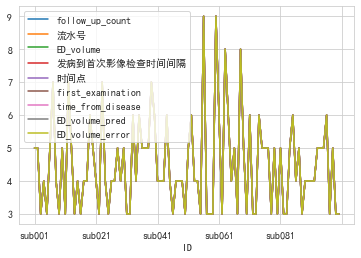

In [27]:
cal_error_data.groupby('ID').count().plot()